# Exploring the very basics of OLS Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Load in data

In [5]:
prostate_df = pd.read_pickle('Data/prostate.pkl')

In [6]:
prostate_df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,train,lpsa
0,-1.637356,-2.006212,-1.862426,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,T,-0.430783
1,-1.988980,-0.722009,-0.787896,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,T,-0.162519
2,-1.578819,-2.188784,1.361163,-1.024706,-0.522941,-0.863171,0.342627,-0.155348,T,-0.162519
3,-2.166917,-0.807994,-0.787896,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,T,-0.162519
4,-0.507874,-0.458834,-0.250631,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,T,0.371564


For this data we are trying to predict/explain lpsa with the other columns

This data comes from Elements of Statistical Learning and has a train column that splits the data into a training and testing set

The data has been prepared the same way as the book

## Univariate regression
Seeing how one variable X explains y

For now, I will focus on just using lcavol and lpsa 

In [7]:
X_train = np.array(prostate_df.query("train == 'T'").lcavol)
y_train = np.array(prostate_df.query("train == 'T'").lpsa)

X_test = np.array(prostate_df.query("train == 'F'").lcavol)
y_test = np.array(prostate_df.query("train == 'F'").lpsa)

## Scatterplot

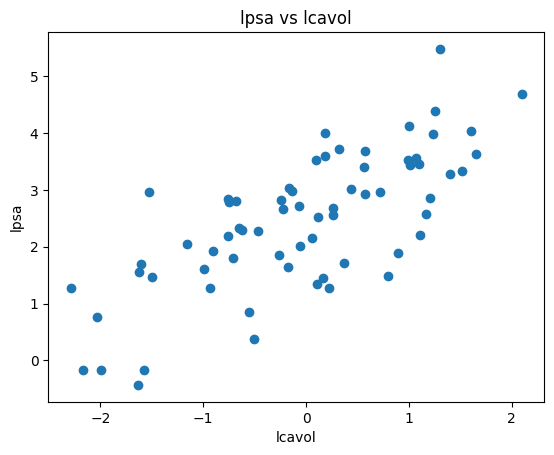

In [12]:
plt.title("lpsa vs lcavol")
plt.xlabel("lcavol")
plt.ylabel("lpsa")
plt.scatter(X_train, y_train);

There looks to be a linear relationship between these variables, and it is easy to imagine a line running through this cloud that could be used to predict lpsa given another lcavol value.

How do we find this line?

OLS or ordinary least squares is one of the most basic methods for finding this line.

But, first what form does this line take?

$$\hat{y} = \beta_0 + \beta_1 x_1$$

This just means our predicted lpsa value equals an intercept plus a slope times whatever lcavol value we plug in.

Our goal is to find the slope and intercept. Just off of look my estimate for the intercept would be 2 and the slope to be 1. Let's plot that and see how it looks.

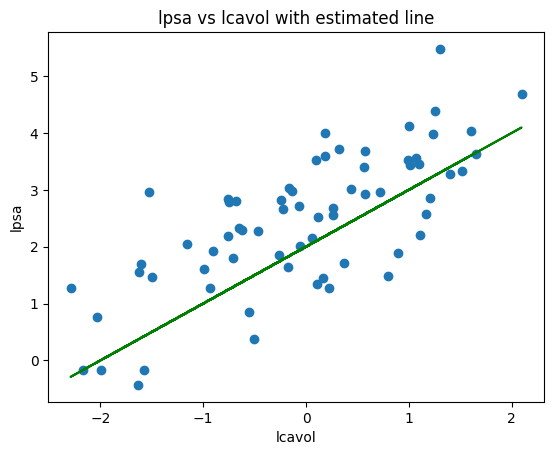

In [27]:
plt.title("lpsa vs lcavol with estimated line")
plt.xlabel("lcavol")
plt.ylabel("lpsa")
plt.plot(X_train, X_train + 2, 'g')
plt.scatter(X_train, y_train);

It actually looks pretty good. How do we quantify how good it is?

Well, the line is some distance from each of the actual data points. Let's plot those and see how much error our predicted value has.

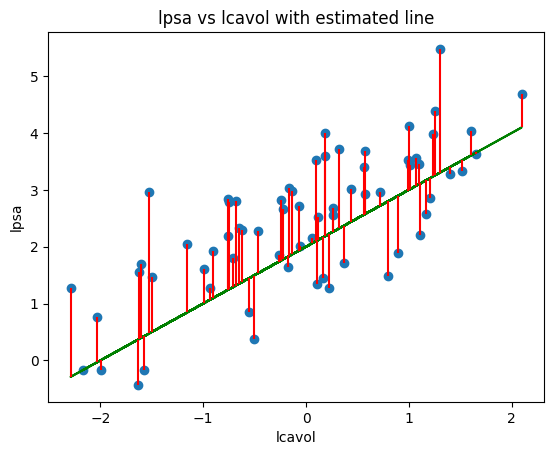

In [30]:
plt.title("lpsa vs lcavol with estimated line")
plt.xlabel("lcavol")
plt.ylabel("lpsa")
plt.plot(X_train, X_train + 2, 'g')
plt.vlines(X_train, X_train + 2, y_train, 'r')
plt.scatter(X_train, y_train);